In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [2]:
hoods = pd.read_excel('D:/Netology/ds2-fall-2017-master/2. - - - - ML/2.6. Сlustering/Homework/geo_comment.xlsx')

In [165]:
hoods.head()

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


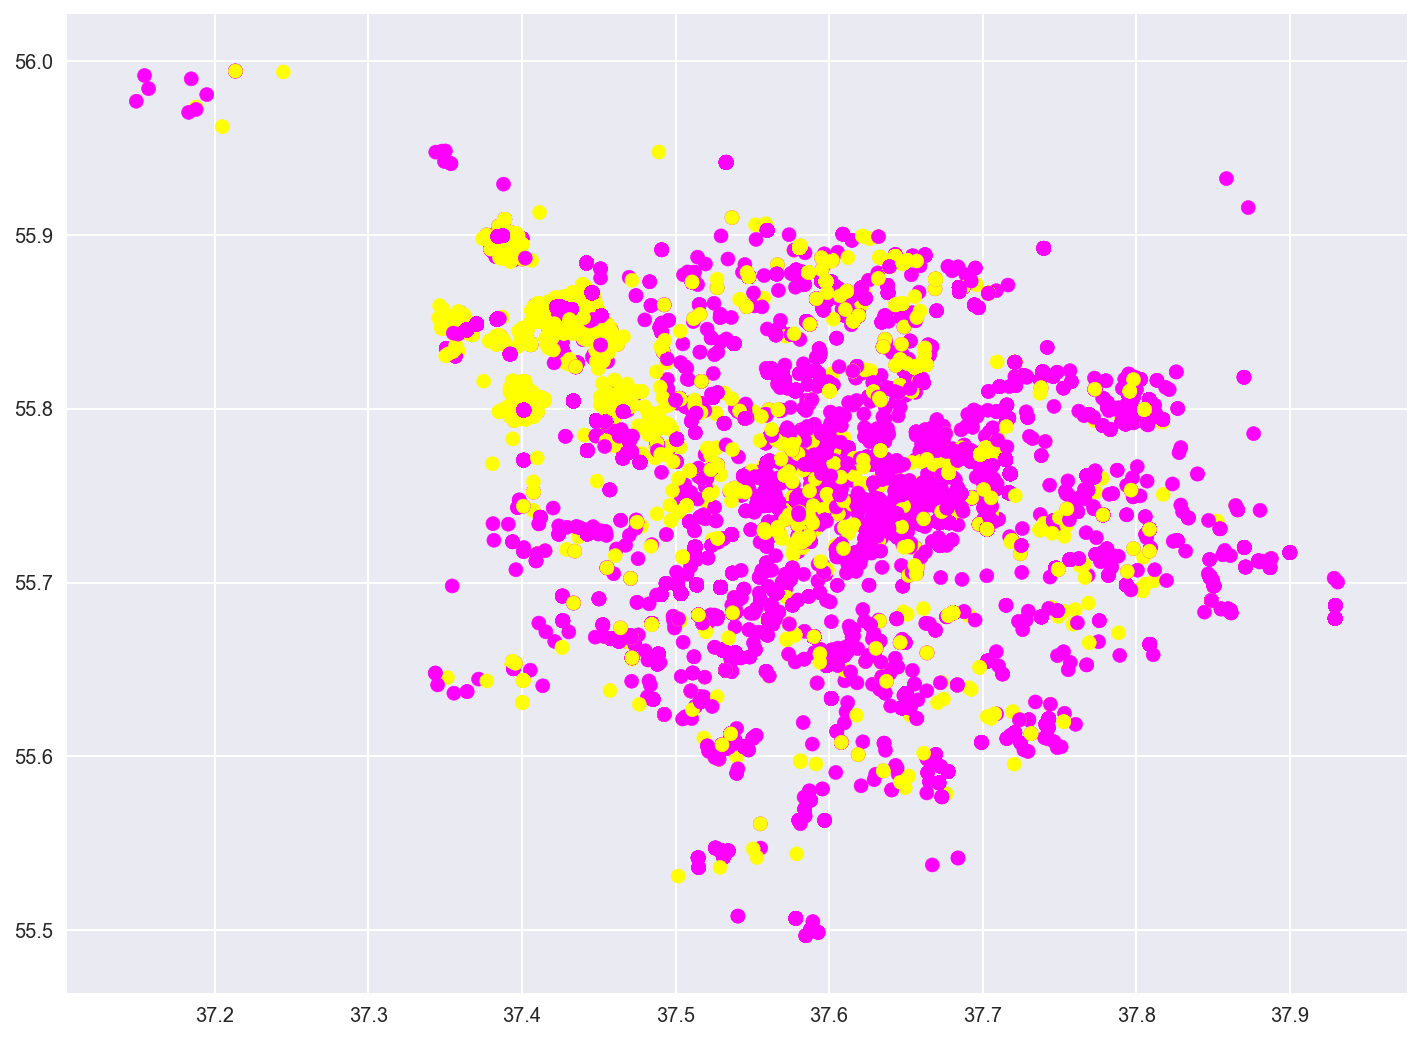

In [4]:
plt.scatter(hoods['x'], hoods['y'], c = hoods['comment_class'], cmap = 'spring')

In [5]:
hoods.shape

(70382, 5)

In [6]:
hoods.drop_duplicates().shape

(11699, 5)

В данных очень много дубликатов, их можно отбросить. 

In [7]:
hoods.drop_duplicates(inplace=True)

In [74]:
hoods.describe()

,x,y,comment_class,multiplier
count,11699.000000,11699.000000,11699.000000,11699.000000
mean,37.560505,55.773821,-0.252928,4.282588
std,0.110886,0.075069,0.967527,41.558123
min,37.148813,55.496939,-1.000000,1.000000
25%,37.454762,55.731445,-1.000000,1.000000
50%,37.566431,55.774679,-1.000000,1.000000
75%,37.644396,55.842385,1.000000,1.000000
max,37.931228,55.994174,1.000000,1500.000000


In [8]:
hoods.shape

(11699, 5)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [86]:
index1 = list(range(11699))

In [91]:
coordinates = pd.DataFrame([hoods.x, hoods.y])
coordinates = coordinates.transpose()

In [13]:
coordinates_scaled = scaler.fit_transform(coordinates)

В Москве 12 АО.

##### Let's use 12 clusters 

In [28]:
kchosen = 12

In [29]:
algo = KMeans(n_clusters=kchosen)

In [30]:
algo_pred = algo.fit_predict(coordinates_scaled)

In [44]:
coordinates_scaled.shape

(11699, 2)

In [31]:
coordinates_scaled

array([[ 0.46817222,  0.04840376],
       [ 0.46817222,  0.04840376],
       [ 0.38593999, -0.42246406],
       ..., 
       [-1.25755025,  0.9982656 ],
       [-1.01005089,  0.25636838],
       [-0.98533974,  0.83659379]])

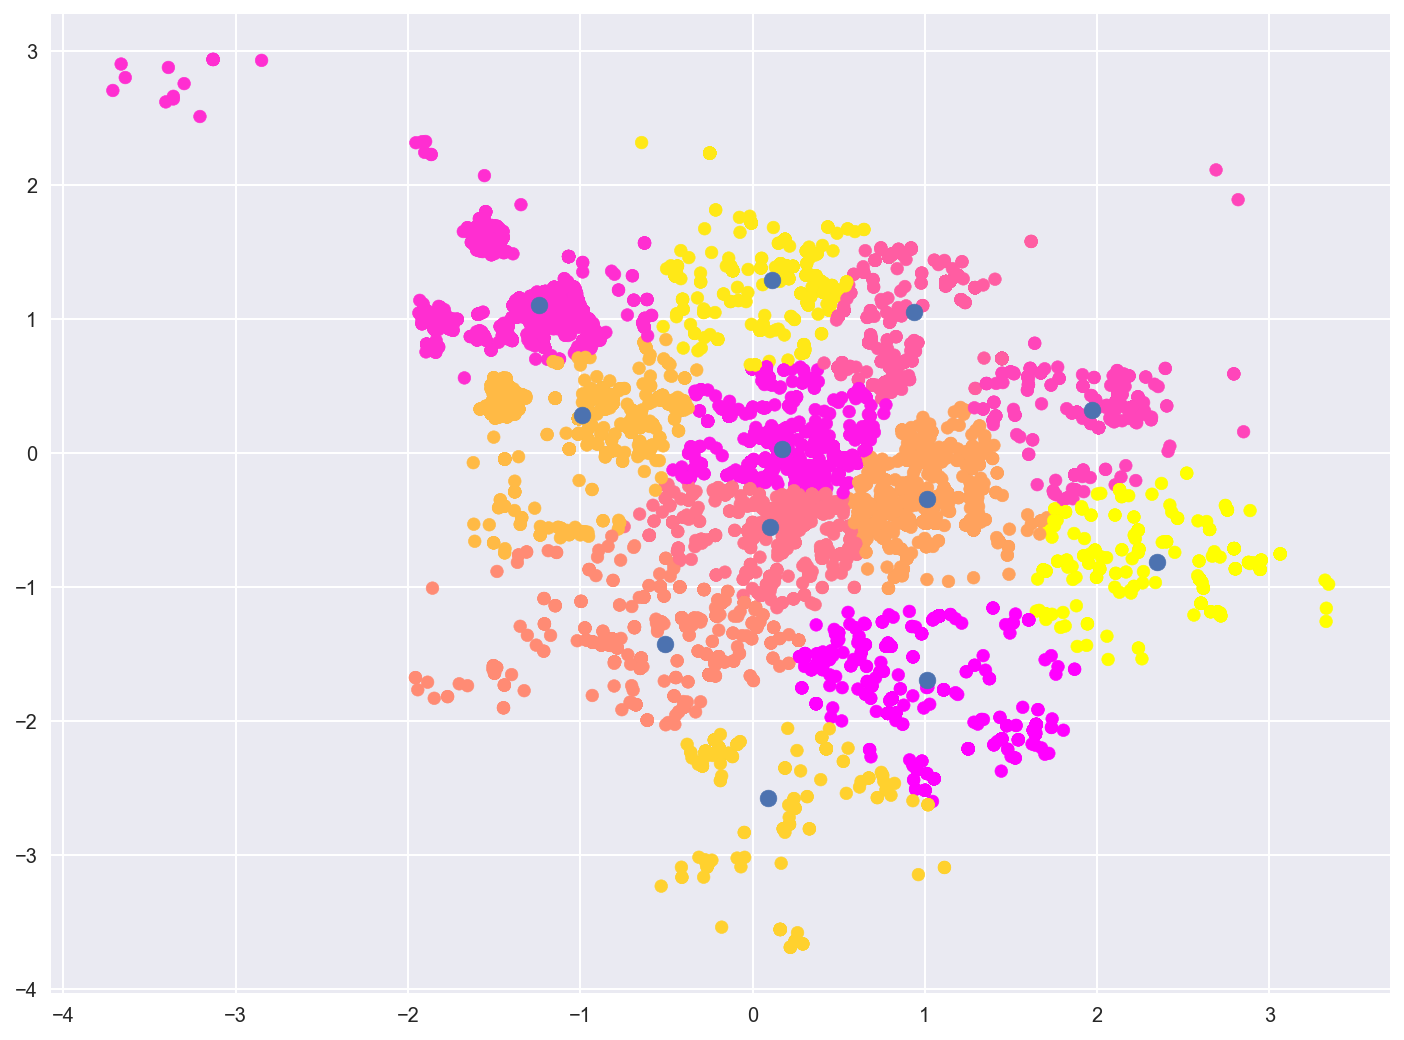

In [32]:
plt.scatter(coordinates_scaled[:,0], #первый параметр по оси Х
           coordinates_scaled[:,1], # second parameter, y axis
            c = algo_pred,  # Предсказанная разбивка на кластеры
            cmap = 'spring',
            s = 40 #size of points 
           )
plt.scatter(algo.cluster_centers_[:,0], 
          algo.cluster_centers_[:,1],
            s = 70)

In [153]:
clusters = pd.DataFrame(algo_pred, columns=['clusters'])

In [154]:
clusters.head()

,clusters
0,1
1,1
2,5
3,5
4,5


In [155]:
index1 = list(clusters.index)

In [156]:
coordinates.index = index1

In [157]:
results = pd.merge(clusters, coordinates, left_index=True, right_index=True)
results.head()

,clusters,x,y
0,1,37.612416,55.777454
1,1,37.612416,55.777454
2,5,37.603298,55.742108
3,5,37.558526,55.728758
4,5,37.566431,55.731794


In [100]:
km = KMeans(n_clusters=12)

In [101]:
kmeans_pred = km.fit_predict(coordinates_scaled)

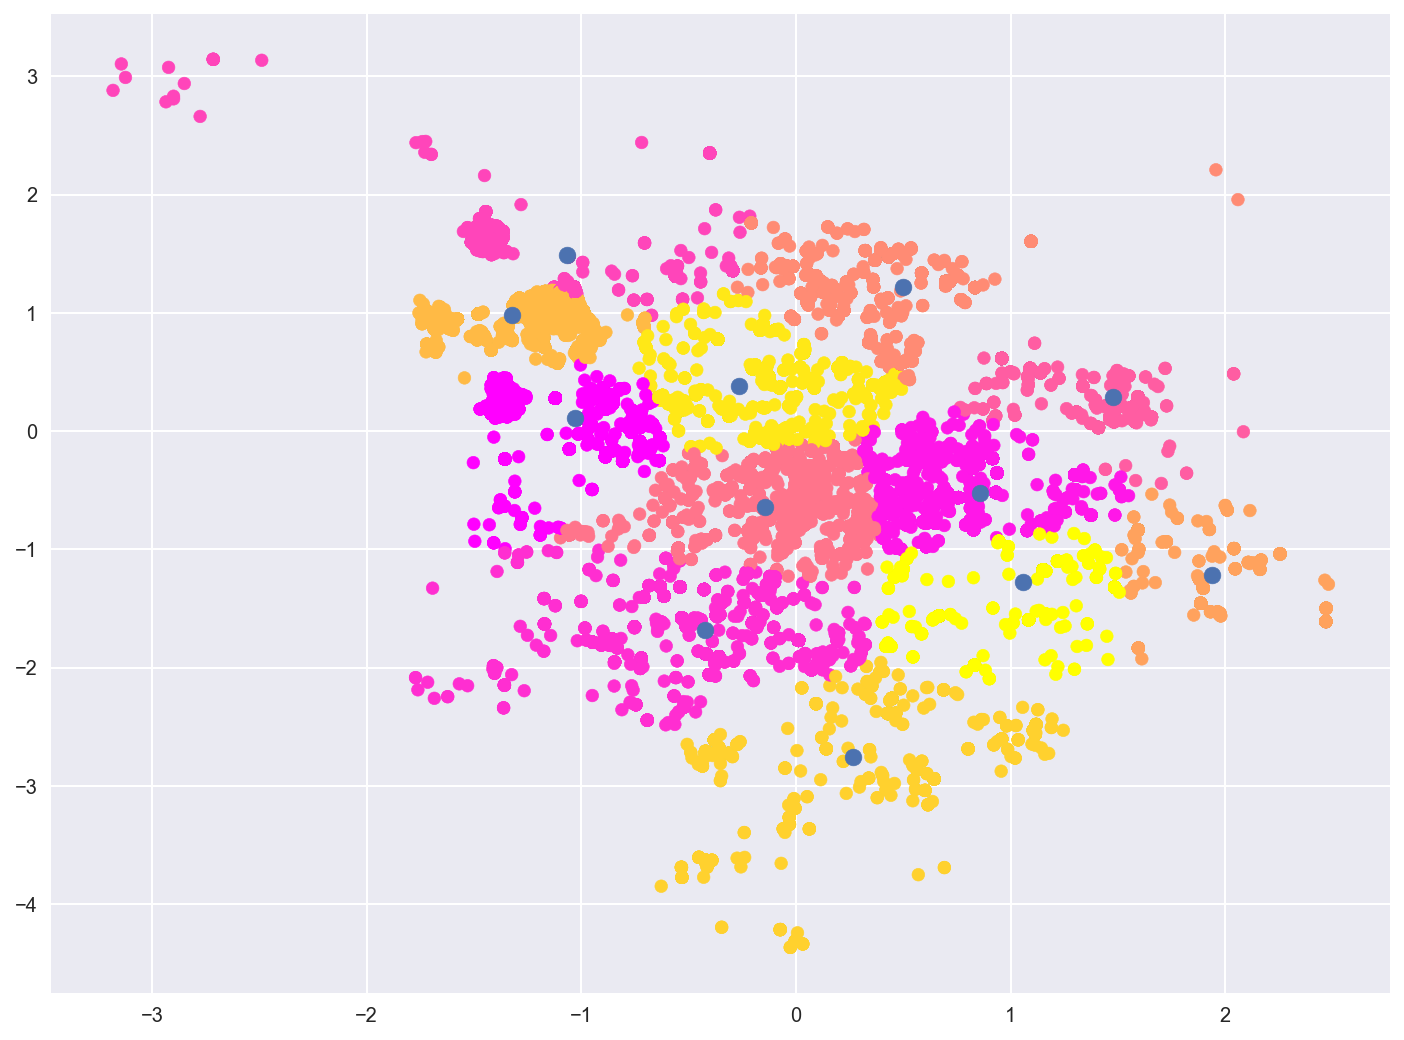

In [104]:
plt.scatter(coordinates_scaled[:,0], #первый параметр по оси Х
           coordinates_scaled[:,1], # second parameter, y axis
            c = kmeans_pred,  # Предсказанная разбивка на кластеры
            cmap = 'spring',
            s = 40 #size of points 
           )
plt.scatter(km.cluster_centers_[:,0], 
           km.cluster_centers_[:,1],
           s = 70)

#### Исследование голосов за и против


In [172]:
hoods.index = index1

In [175]:
votefor = hoods['comment_class']==1

In [188]:
forv = list(votefor[votefor == True].index)

In [191]:
hoods1 = hoods.iloc[forv]

In [205]:
coordinatesfor = scaler.fit_transform(pd.DataFrame([hoods1.x, hoods1.y]).transpose())

In [206]:
coordinatesfor

array([[ 0.7497796 , -1.06052474],
       [ 0.75340335, -1.18562301],
       [ 0.47098071, -1.27511801],
       ..., 
       [-0.51318215,  0.47521917],
       [-0.4831005 , -0.24348327],
       [-0.79008203,  0.67215685]])

In [210]:
kmeans_pred = algo.fit_predict(coordinatesfor)

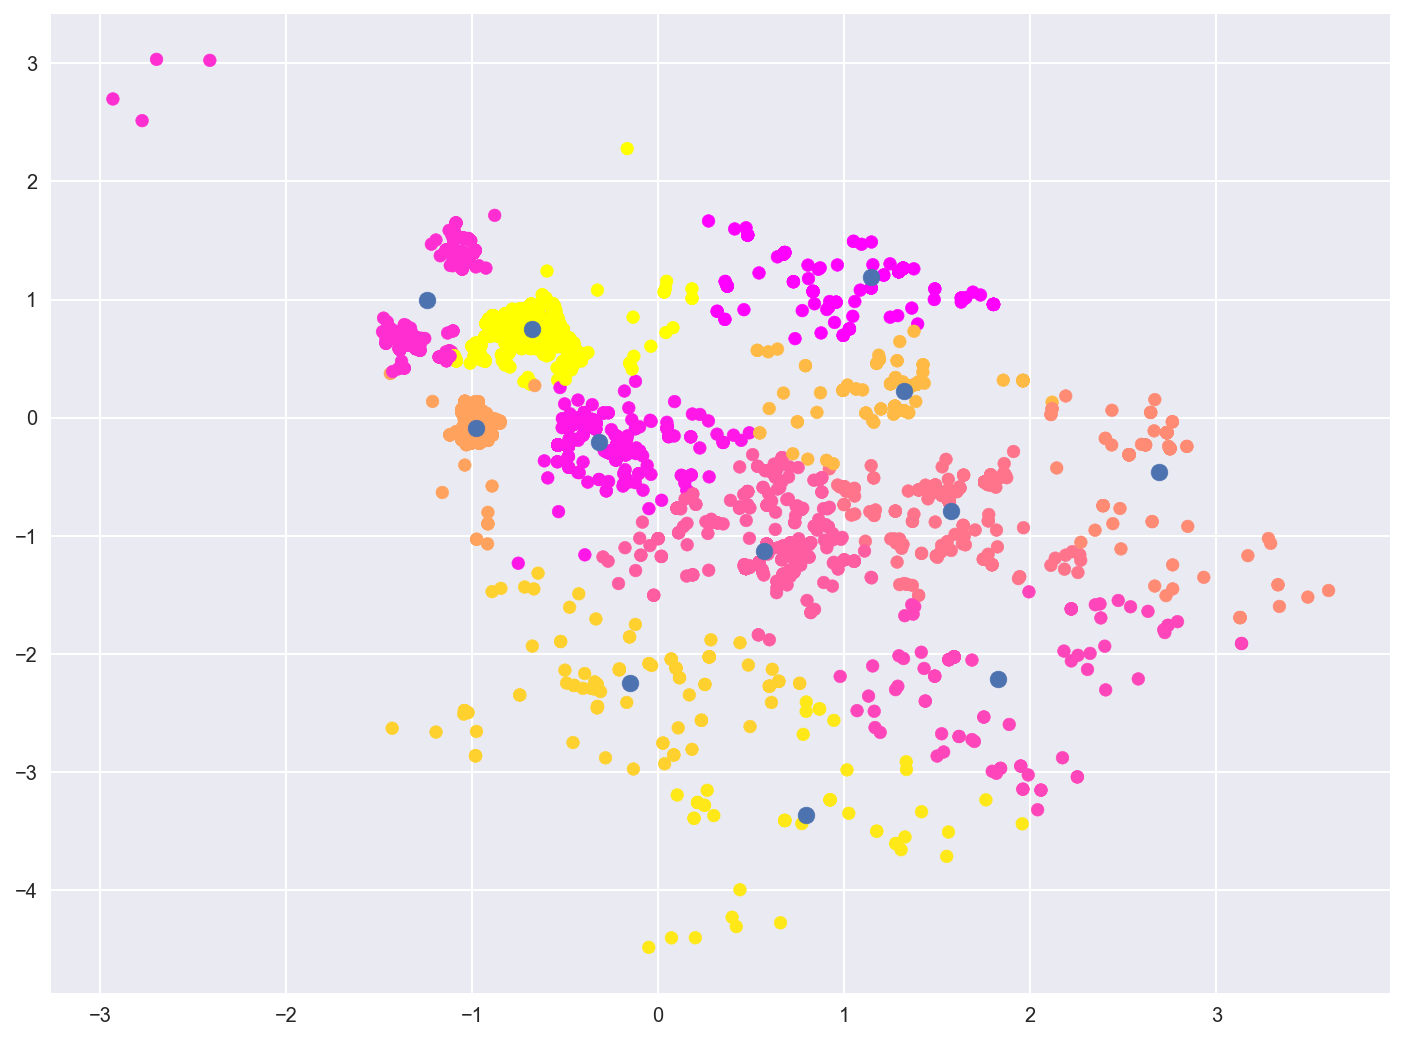

In [211]:
plt.scatter(coordinatesfor[:,0], #первый параметр по оси Х
           coordinatesfor[:,1], # second parameter, y axis
            c = kmeans_pred,  # Предсказанная разбивка на кластеры
            cmap = 'spring',
            s = 40 #size of points 
           )
plt.scatter(algo.cluster_centers_[:,0], 
           algo.cluster_centers_[:,1],
           s = 70)

In [212]:
votefor = hoods['comment_class']== -1

In [213]:
forv = list(votefor[votefor == True].index)

In [214]:
hoods1 = hoods.iloc[forv]

In [215]:
coordinatesfor = scaler.fit_transform(pd.DataFrame([hoods1.x, hoods1.y]).transpose())

In [216]:
coordinatesfor

array([[ 0.2028849 ,  0.31388162],
       [ 0.2028849 ,  0.31388162],
       [ 0.11094397, -0.1558838 ],
       ..., 
       [-2.09706008,  1.93019045],
       [-1.4498637 ,  0.52135935],
       [-1.42223504,  1.10022635]])

In [217]:
kmeans_pred = algo.fit_predict(coordinatesfor)

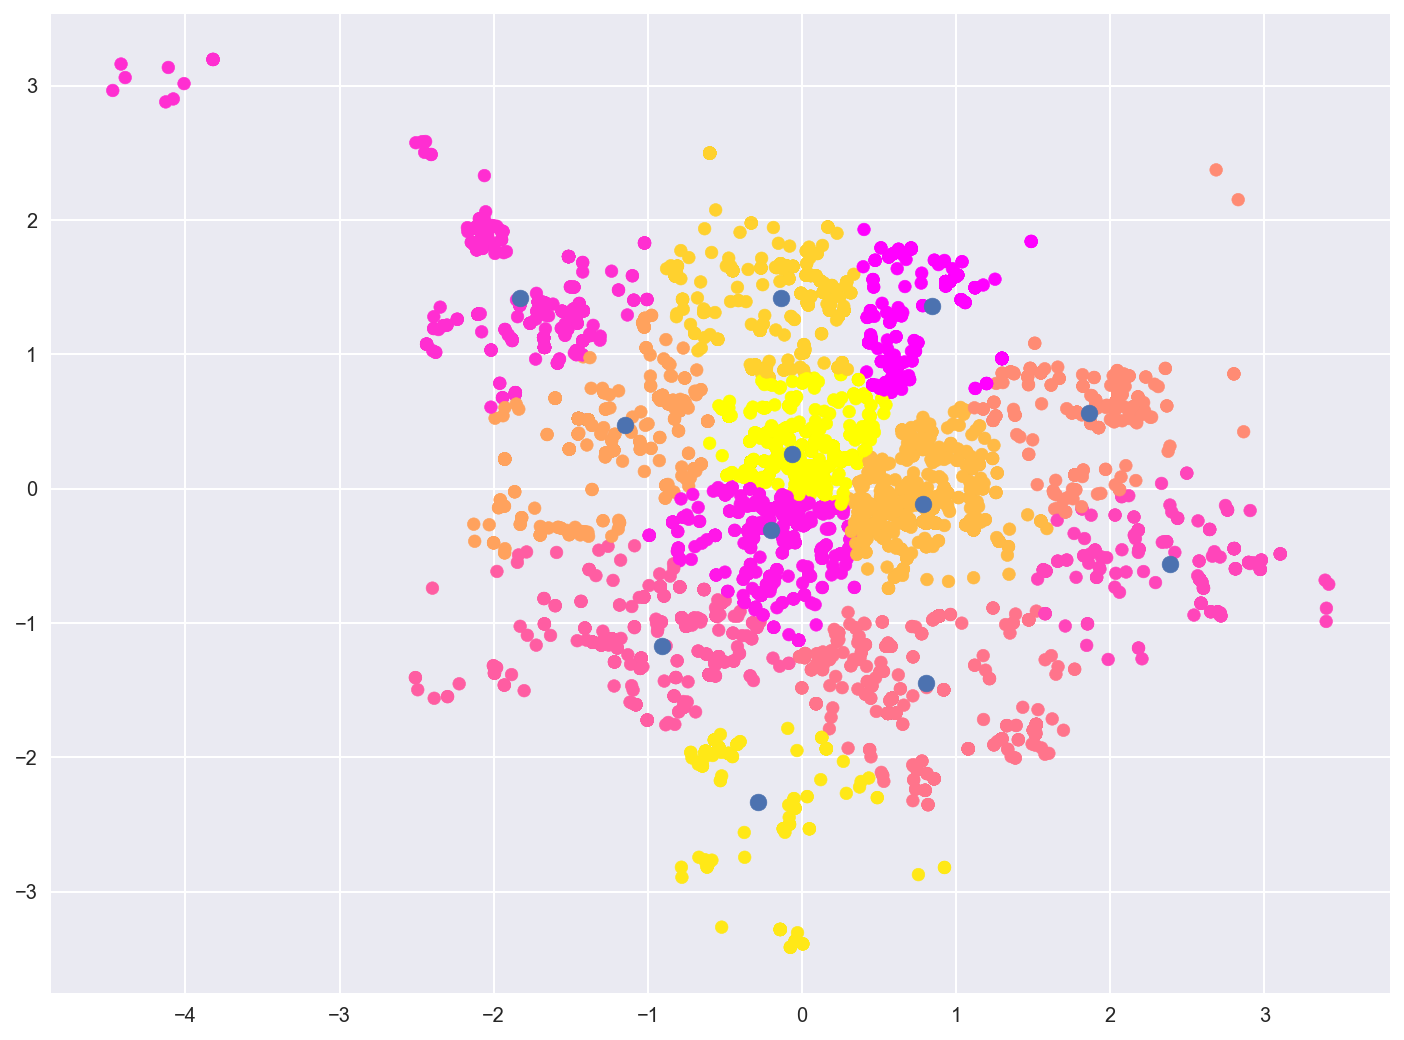

In [218]:
plt.scatter(coordinatesfor[:,0], #первый параметр по оси Х
           coordinatesfor[:,1], # second parameter, y axis
            c = kmeans_pred,  # Предсказанная разбивка на кластеры
            cmap = 'spring',
            s = 40 #size of points 
           )
plt.scatter(algo.cluster_centers_[:,0], 
           algo.cluster_centers_[:,1],
           s = 70)

####  Optimal number of clusters

In [14]:
from sklearn.cluster import KMeans

In [15]:
k_inertia = []
ks = range(1,21)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(coordinates_scaled)
    k_inertia.append(clf_kmeans.inertia_)

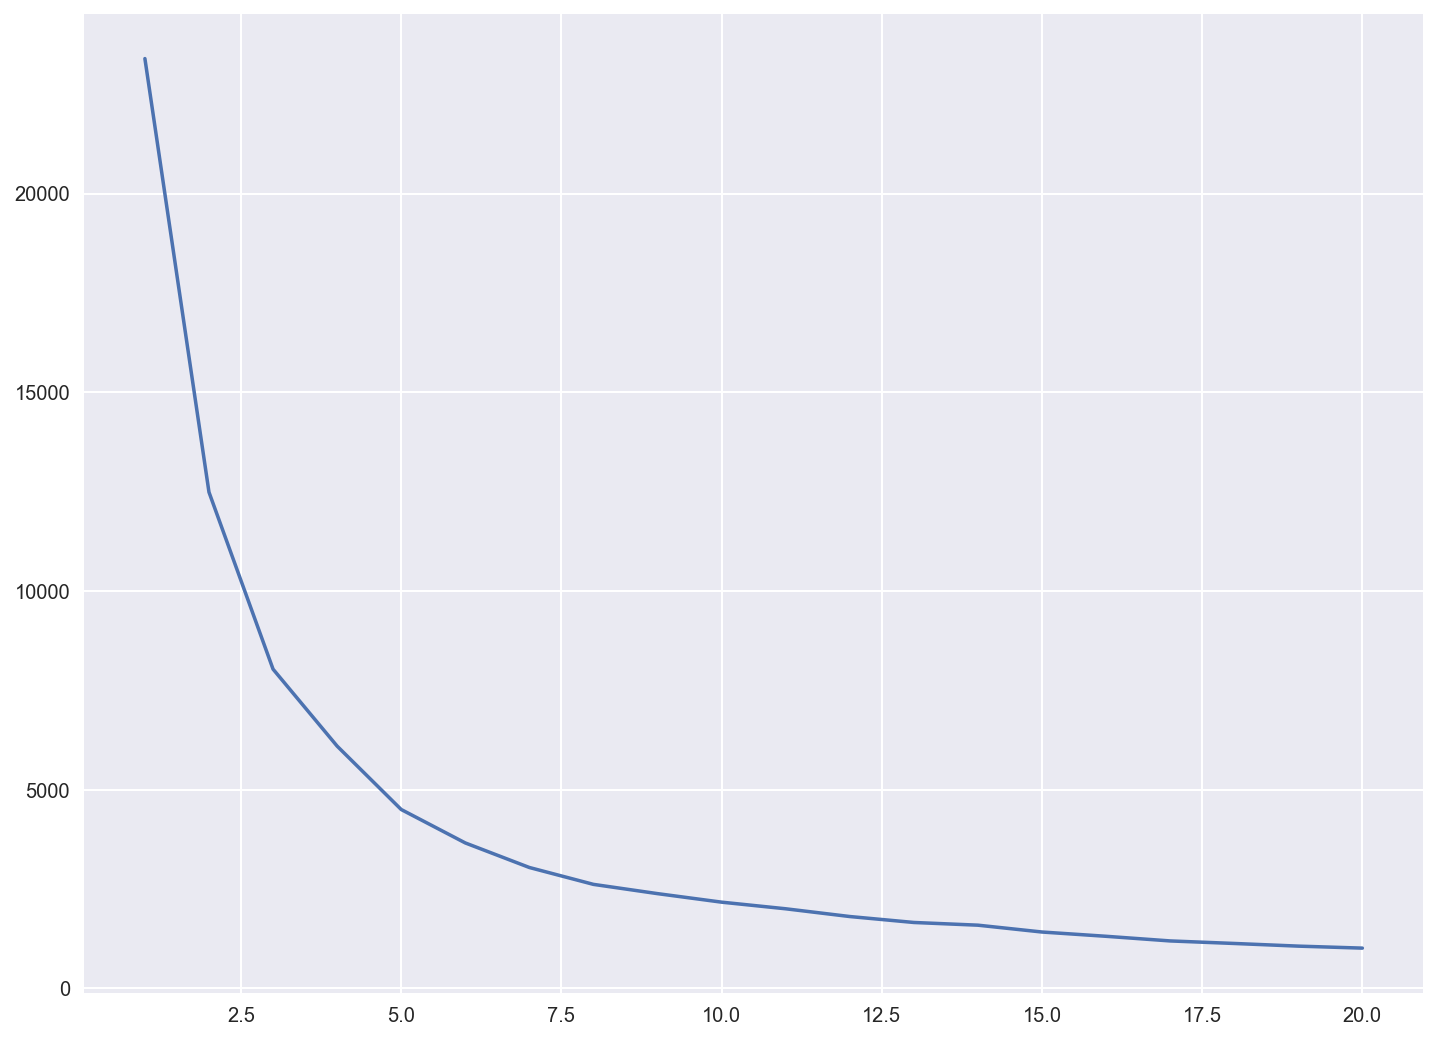

In [16]:
plt.plot(ks, k_inertia)

In [17]:
diff = np.diff(k_inertia)

In [18]:
diff_r = diff[1:] / diff[:-1]

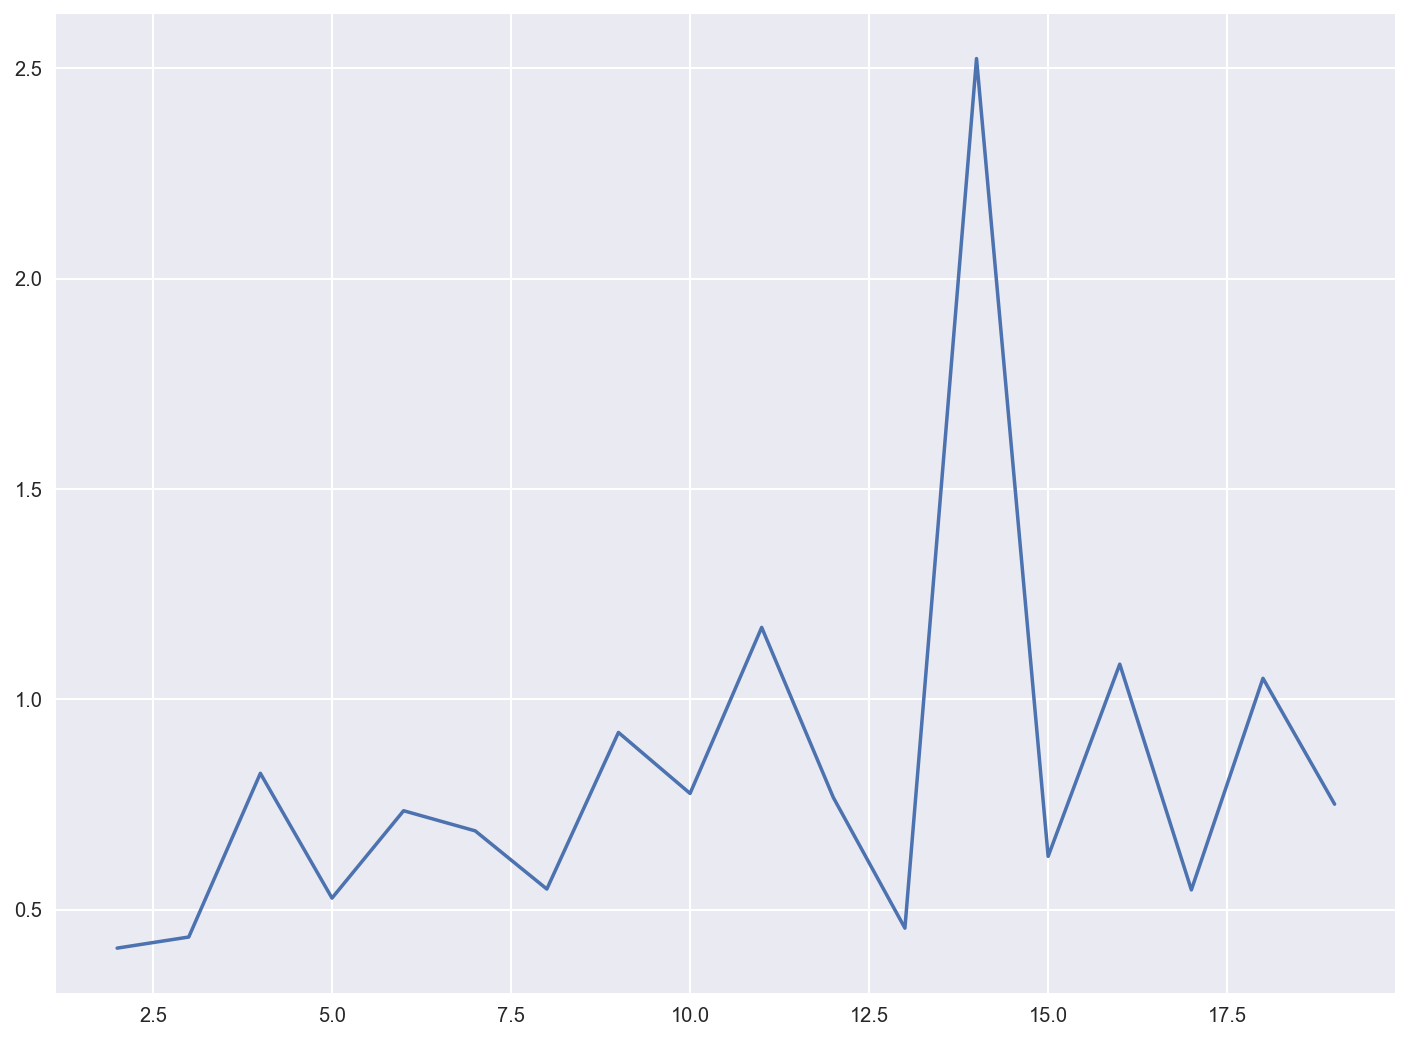

In [19]:
plt.plot(ks[1:-1], diff_r)

In [21]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

2

#### Let's use 2 clusters as the optimal case. 

In [23]:
algo = KMeans(n_clusters=k_opt)

In [24]:
algo_pred = algo.fit_predict(coordinates_scaled)

In [25]:
algo_pred

array([1, 1, 1, ..., 0, 0, 0])

In [61]:
coordinates_scaled

array([[ 0.46817222,  0.04840376],
       [ 0.46817222,  0.04840376],
       [ 0.38593999, -0.42246406],
       ..., 
       [-1.25755025,  0.9982656 ],
       [-1.01005089,  0.25636838],
       [-0.98533974,  0.83659379]])

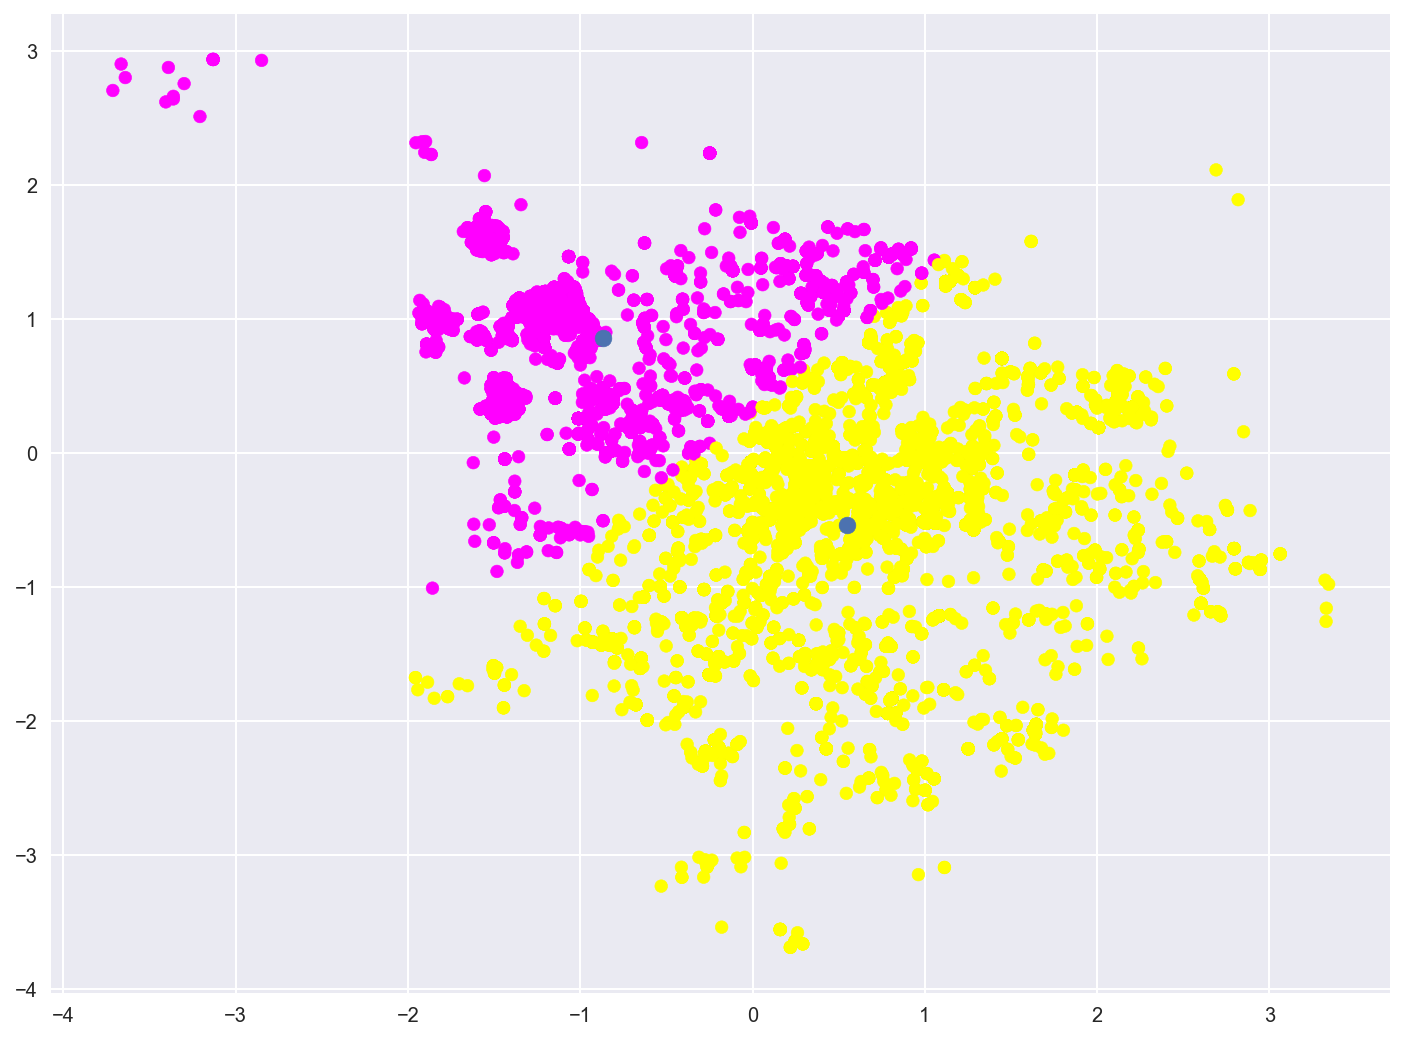

In [27]:
plt.scatter(coordinates_scaled[:,0], #первый параметр по оси Х
           coordinates_scaled[:,1], # second parameter, y axis
            c = algo_pred,  # Предсказанная разбивка на кластеры
            cmap = 'spring',
            s = 40 #size of points 
           )
plt.scatter(algo.cluster_centers_[:,0], 
          algo.cluster_centers_[:,1],
            s = 70)